Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2024
<br>

<h1><center>Tarea 2: HAC, DBSCAN, HDBSCAN y GMM </center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 26 de abril


## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [5]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 35.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039290 sha256=66ff9ceb04645b9716c9131a0f686c4d54c890648e05a13074c2b81ef38abc0f
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from random import random
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, minmax_scale
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, cluster_optics_dbscan
from hdbscan import HDBSCAN
from sklearn.mixture import GaussianMixture

# Introducción

El conjunto de datos correspnde a características extraidas de imagenes de distintos tipos de frijoles secos, los cuales presentan distintas formas, figuras, tipos y estructuras. Según esta premisa, el objetivo de la tarea es identificar en qué consiste el dataset entregado para predecir el tipo de frijol al cual corresponde cada dato (dado por la columna "Class") por medio del uso de HAC, DBSCAN, HDBSCAN y GMM.

En esta tarea deberás trabajar con el dataset de Dry Bean que puedes descargar de [Kaggle](https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification) o desde canvas.

# Parte 1: Carga y Preprocesamiento de Datos (9 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de datos (1 puntos)

In [7]:
lect = pd.read_csv('dry_bean_dataset.csv')
lect

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### 1.2 Descripcion del Dataset (5 puntos)

#### 1.2.1 Describa brevemente cuantas columnas tiene el dataset y en que consisten las columna del dataset entregado (1 puntos)

In [8]:
print(f'El dataset tiene {lect.shape[1]} columnas.')

El dataset tiene 17 columnas.


Además, las columnas representan distintas características físicas de los frijoles:

In [ ]:
print(f'Las columnas son:')
print()
for col in lect.columns:
    print(col)

Las columnas son:

Area
Perimeter
MajorAxisLength
MinorAxisLength
AspectRation
Eccentricity
ConvexArea
EquivDiameter
Extent
Solidity
roundness
Compactness
ShapeFactor1
ShapeFactor2
ShapeFactor3
ShapeFactor4
Class


#### 1.2.2 ¿Es posible en este dataset eliminar columnas sin afectar de manera significativa los datos? ¿Por qué? (2 puntos)

In [ ]:
for col in lect.columns:
    if not col == 'Class':
        print(f'La columna "{col}" tiene desviación estándar igual a {lect[col].std()}')

La columna "Area" tiene desviación estándar igual a 29324.095716881944
La columna "Perimeter" tiene desviación estándar igual a 214.28969589196143
La columna "MajorAxisLength" tiene desviación estándar igual a 85.69418595933297
La columna "MinorAxisLength" tiene desviación estándar igual a 44.97009129411452
La columna "AspectRation" tiene desviación estándar igual a 0.24667845568580302
La columna "Eccentricity" tiene desviación estándar igual a 0.09200176320620876
La columna "ConvexArea" tiene desviación estándar igual a 29774.91581700001
La columna "EquivDiameter" tiene desviación estándar igual a 59.17712014871188
La columna "Extent" tiene desviación estándar igual a 0.04908636684396477
La columna "Solidity" tiene desviación estándar igual a 0.004660379169838444
La columna "roundness" tiene desviación estándar igual a 0.05951988794941905
La columna "Compactness" tiene desviación estándar igual a 0.06171346311682394
La columna "ShapeFactor1" tiene desviación estándar igual a 0.0011279

Como se aprecia, en general, "ShapeFactor[i]" (i= 1, 2, 3, 4) no aporta mucho al dataset ya que tienen poca variabilidad. De todas formas optaré por no sacar estas columnas.

#### 1.2.3 ¿Cuantos tipos de frijoles hay? ¿Qué puedes observar sobre la cantidad de frijoles por clase? ¿Existe un desbalance de clases? (2 puntos)

In [9]:
lect['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Hay 7 clases de frijoles, con DERMASON siendo evidentemente más pesado que otras clases como BOMBAY. Se concluye que en general las clases están desbalanceadas.

### 1.3 Determinación de valores nulos (1 punto)

In [14]:
nan_rows = lect.isna().any(axis=1)

contador = 0
for i in nan_rows:
    if i:
      contador += 1

contador

0

Luego, no hay valores nulos en el dataset.

### 1.4 Manejo del Dataset (2 puntos)

In [15]:
cuan = lect.drop('Class', axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
nrm_cuan =  min_max_scaler.fit_transform(cuan)

In [16]:
cual = lect['Class']

Como lo que se quiere hacer es predecir la clase de los frijoles, no tiene sentido considerar esta columna.

Es importante normalizar ya que existen columnas como convex area con valor númerico mucho mayor a otras columnas. Si no se normaliza se le estaría dando mucho peso a una columna en particular.

# Parte 2: HAC (5 puntos)

### 2.1 Reliza un dendograma sin clusters y con distancia threshold igual a 0 para visualizar los datos (1 punto)

In [18]:
#HAC pedido
hac = AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters=None)
hac = hac.fit(nrm_cuan)

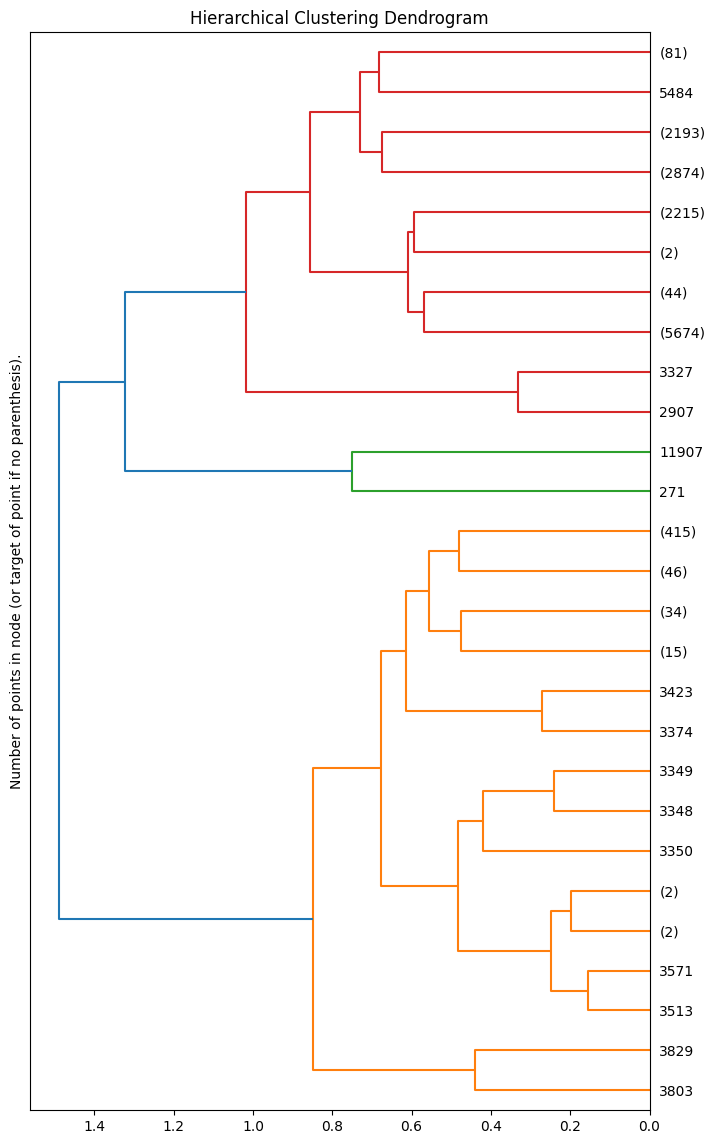

In [19]:
#Función sacada de códigos de profesor
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(8, 14))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(hac, truncate_mode="level", p=5, orientation = 'left')
plt.ylabel("Number of points in node (or target of point if no parenthesis).")
plt.show()

### 2.2 Realiza los Clustering de Agrupación Jerarquica (HAC) para cada distancia de clustering aglomerativo (linkage), prueba utilizando número entre 2 y 10. Calcula el Silhouette para ver cual funcionó mejor y explica el por qué de los resultados. (1.5 puntos)


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_1 = []
silhouette_2 = []
silhouette_3 = []
silhouette_4 = []

for cluster in range(2, 11):
    hac1 = AgglomerativeClustering(distance_threshold = None, linkage = 'average', n_clusters = cluster)
    hac1 = hac1.fit(nrm_cuan)
    silhouette_1.append(silhouette_score(nrm_cuan, hac1.labels_, metric="euclidean",))

    hac2 = AgglomerativeClustering(distance_threshold = None, linkage = 'single', n_clusters = cluster)
    hac2 = hac2.fit(nrm_cuan)
    silhouette_2.append(silhouette_score(nrm_cuan, hac2.labels_, metric="euclidean",))

    hac3 = AgglomerativeClustering(distance_threshold = None, linkage = 'complete', n_clusters = cluster)
    hac3 = hac3.fit(nrm_cuan)
    silhouette_3.append(silhouette_score(nrm_cuan, hac3.labels_, metric="euclidean",))

    hac4 = AgglomerativeClustering(distance_threshold = None, linkage = 'ward', n_clusters = cluster)
    hac4 = hac4.fit(nrm_cuan)
    silhouette_4.append(silhouette_score(nrm_cuan, hac4.labels_, metric="euclidean",))

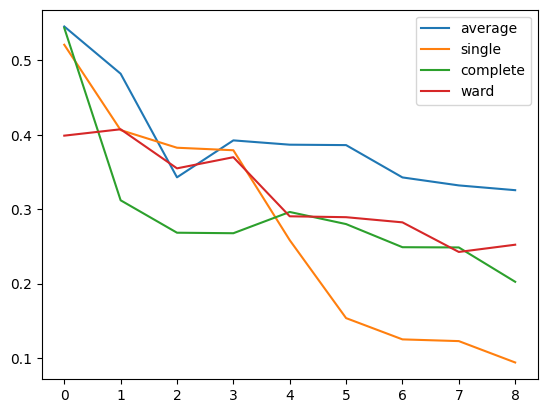

In [ ]:
plt.plot(silhouette_1)
plt.plot(silhouette_2)
plt.plot(silhouette_3)
plt.plot(silhouette_4)
plt.legend(['average', 'single','complete','ward'])
plt.show()

Como se ve, el mejor desempeño lo tuvo 'average', mientras que 'complete' y 'single' suelen ser los peores. Además, el silhouette score se maximiza con 2 clusters (eje X están _shifted_ por 2). Esto se puede explicar ya que average involucra todo par de distancias, mientras que single y complete solo toman un par (mínimo y máximo).

### 2.3 Ahora, realiza los Clustering de Agrupación Jerarquica (HAC) para cada tipo de linkage. Calcula el Silhouette para ver cual funcionó mejor y explica el por qué de los resultados, mencionando en manera funciona cada linkage. (1.5 puntos)

Esto fue lo que se hizo en el punto anterior. Basta explicar el funcionamiento de los linkage. Todos en el fondo son una forma de cuantificación de distancias de clusters.
* **average** : Toma el promedio de todas las distancias posibles entre 2 clusters (no se toman en el mismo cluster).
* **single**: Toma la menor distancia entre un par de puntos $a,b$ que no se encuentran en el mismo cluster.
* **complete**: Toma la mayor distancia entre un par de puntos $a,b$ que no se encuentran en el mismo cluster.
* **ward**: Una distancia que intenta minimizar el aumento de distancia al juntar 2 clusters.

### 2.4 Grafica los clusters utilizando un PCA de 2 dimensiones de los datos. (1 punto)

In [20]:
hac_fin = AgglomerativeClustering(distance_threshold = None, linkage = 'average', n_clusters = 2)
hac_fin = hac_fin.fit(nrm_cuan)

In [21]:
pca = PCA(n_components=2)
data = pca.fit_transform(nrm_cuan)

Text(0.5, 1.0, 'Clustering HAC with average')

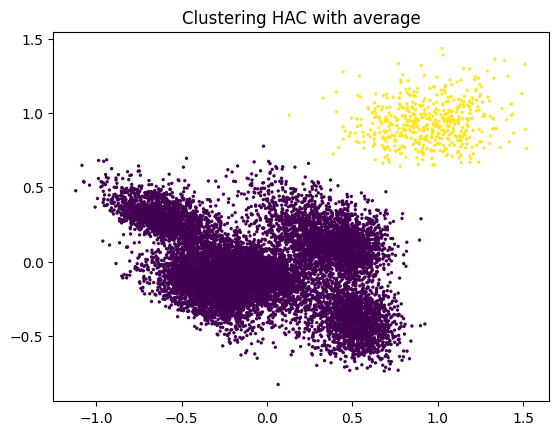

In [22]:
plt.scatter(data[:,0],data[:,1], s = 2, c = hac_fin.labels_)
plt.title('Clustering HAC with average')

Text(0.5, 1.0, 'Clustering HAC with ward')

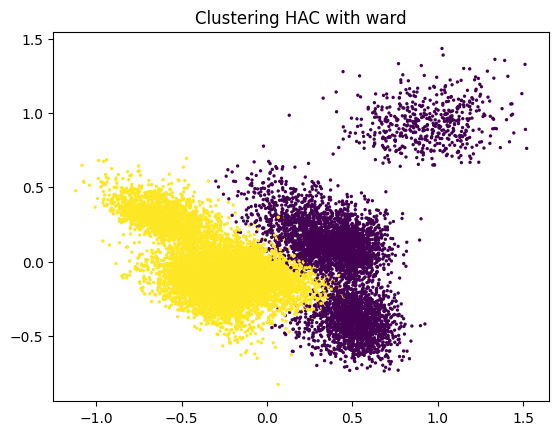

In [23]:
hac_fin = AgglomerativeClustering(distance_threshold = None, linkage = 'ward', n_clusters = 2)
hac_fin = hac_fin.fit(nrm_cuan)
plt.scatter(data[:,0],data[:,1], s = 2, c = hac_fin.labels_)
plt.title('Clustering HAC with ward')

Text(0.5, 1.0, 'Clustering HAC with complete')

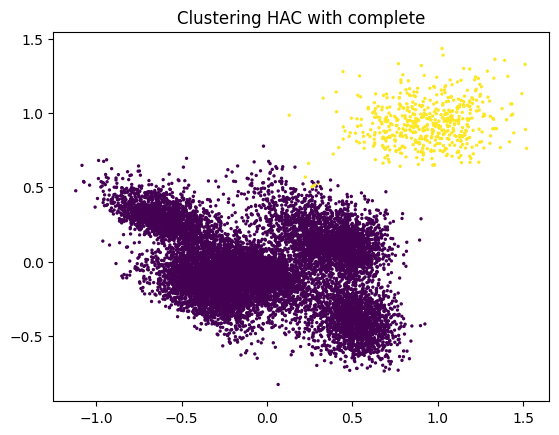

In [24]:
hac_fin = AgglomerativeClustering(distance_threshold = None, linkage = 'complete', n_clusters = 2)
hac_fin = hac_fin.fit(nrm_cuan)
plt.scatter(data[:,0],data[:,1], s = 2, c = hac_fin.labels_)
plt.title('Clustering HAC with complete')

Text(0.5, 1.0, 'Clustering HAC with single')

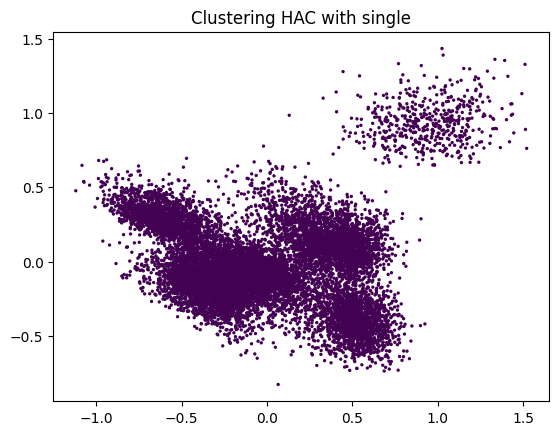

In [25]:
hac_fin = AgglomerativeClustering(distance_threshold = None, linkage = 'single', n_clusters = 2)
hac_fin = hac_fin.fit(nrm_cuan)
plt.scatter(data[:,0],data[:,1], s = 2, c = hac_fin.labels_)
plt.title('Clustering HAC with single')

Como se aprecia, hay una diferencia importante al seleccionar distintos tipos de linkage. Como se vió en clases, un tipo de linkage no necesariamente es el mejor siempre, por lo que se debe siempre intentar comparar los silhouette de los distintos linkage.

# Parte 3: DBSCAN y HDBSCAN (15 puntos)

### 3.1.- DBSCAN

Utilizando DBSCAN, itera sobre valores de eps entre 0.25 y 2, con un salto de 0.25 por iteracion. Ademas, itera sobre el numero minimo de muestras, probando con 1, 2, 3 y 4. (3 puntos)

In [ ]:
for i in range(0, 8):
    for j in [1, 2, 3, 4]:
        eps = i * 0.25 + 0.25
        dbscan = cluster.DBSCAN(eps=eps, min_samples=j)
        model = dbscan.fit(nrm_cuan)
        if len(np.unique(model.labels_)) > 1:
            sil = silhouette_score(nrm_cuan, model.labels_, metric="euclidean")
            print(f'Para eps={eps} y mínimo de muestras={j}, el silhouette score es: {sil}.')

Para eps=0.25 y mínimo de muestras=1, el silhouette score es: -0.16170687123244784.
Para eps=0.25 y mínimo de muestras=2, el silhouette score es: 0.37697227257051036.
Para eps=0.25 y mínimo de muestras=3, el silhouette score es: 0.37697227257051036.
Para eps=0.25 y mínimo de muestras=4, el silhouette score es: 0.38543103234349657.
Para eps=0.5 y mínimo de muestras=1, el silhouette score es: 0.40631457891501843.
Para eps=0.5 y mínimo de muestras=2, el silhouette score es: 0.4703470282718301.
Para eps=0.5 y mínimo de muestras=3, el silhouette score es: 0.4703470282718301.
Para eps=0.5 y mínimo de muestras=4, el silhouette score es: 0.4703470282718301.


#### 3.1.2 Con la informacion de los parametros anterior, calcula cual es el numero de clusters optimo para el modelo DBSCAN. (1.5 puntos)

Los parámetros que optimizaron fueron eps=0.5 y mínimo de muestras=3.

In [ ]:
dbscan = cluster.DBSCAN(eps=0.5, min_samples=3)
model = dbscan.fit(nrm_cuan)

n_clusters_ = len(set(model.labels_))
print(f'Número de cluster óptimo: {n_clusters_}')

Número de cluster óptimo: 2


#### 3.1.3 Determine tambien el valor optimo del parametro `eps` y `min_samples` (0.5 puntos)

Se discutió arriba: eps=0.5 y mínimo de muestras=3.

#### 3.1.4 Obtenga el numero de clusters utilizando los parametros optimos encontrados. Explique porque podria haber encontrado ese valor, el cual se puede o no ajustar al numero de clases en el dataset. (1 puntos)

Como se discutió arriba, se necesitan como óptimo 2 clusters. Este número no es igual a las 7 clases. Esta diferencia se puede deber a que los datos de distintas clases están cerca de datos de distinta clase , por lo que se considera todo como un cluster, o quizás se debe al desbalance de las clases . Para verificar esto usaremos la gráfica obtenida en 4.1. Como se puede apreciar, 6 de los 7 clusters se encuentran relativamente cerca, por lo que se consideran todos como un solo cluster, resultando con un total de solo 2 clusters.

Se espera un analisis de ajuste de datos a clusters contra las clases. Puntaje por analisis y justificacion.

### 3.2.- HDBSCAN

Utilizando HDSCAN, cree un modelo con el `cluster_selection_epsilon` igual al caso de DBSCAN y determine el numero de clusters. Itere sobre el min_cluster_size para encontrar el mejor silhoutte score. Compare el resultado con DBSCAN.  (3 puntos)

In [26]:
eps = 0.5
for j in range(2, 10):
      hdbscan = HDBSCAN(cluster_selection_epsilon=eps, min_cluster_size=j)
      model = hdbscan.fit(nrm_cuan)
      if len(np.unique(model.labels_)) > 1:
          sil = silhouette_score(nrm_cuan, model.labels_, metric="euclidean")
          print(f'Para eps={eps} y mínimo tamaño de cluster={j}, el silhouette score es: {sil}.')

Para eps=0.5 y mínimo tamaño de cluster=2, el silhouette score es: 0.40076201082161006.
Para eps=0.5 y mínimo tamaño de cluster=3, el silhouette score es: 0.379588381729645.
Para eps=0.5 y mínimo tamaño de cluster=4, el silhouette score es: 0.3827287481510033.
Para eps=0.5 y mínimo tamaño de cluster=5, el silhouette score es: 0.3967739124981249.
Para eps=0.5 y mínimo tamaño de cluster=6, el silhouette score es: 0.39298288673808385.
Para eps=0.5 y mínimo tamaño de cluster=7, el silhouette score es: 0.45206518160527837.
Para eps=0.5 y mínimo tamaño de cluster=8, el silhouette score es: 0.4461939981688231.
Para eps=0.5 y mínimo tamaño de cluster=9, el silhouette score es: 0.4095372486928782.


Luego, el min_cluster_size óptimo es = 7, que coincide con el número de clases. En ese sentido, HDBSCAN funciona mejor que DBSCAN.

#### 3.2.2 Grafique los clusters utilizando PCA de 2 dimensiones. (1 punto)

Text(0.5, 1.0, 'Clustering HDBSCAN')

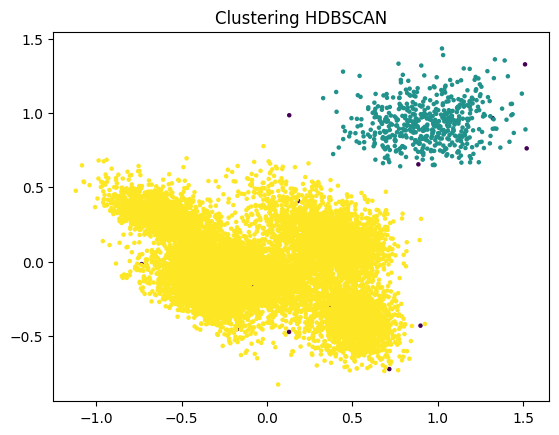

In [27]:
hdbscan = HDBSCAN(cluster_selection_epsilon=0.5, min_cluster_size=7)
model = hdbscan.fit(nrm_cuan)

pca = PCA(n_components=2)
data = pca.fit_transform(nrm_cuan)

plt.scatter(data[:,0],data[:,1], s = 5, c = model.labels_)
plt.title('Clustering HDBSCAN')

Nuevamente se generan 2 clusters grandes, sin embargo, HDBSCAN logra identificar otros clusters que probablemente son ruidos. De esta forma, los clusters son:
* El grupo de 6 clusters cercanos
* El cluster más alejado
* Ruido

### 3.4 Preguntas teoricas sobre HAC, DBSCAN y HDBSCAN (5 puntos)

#### 3.4.1 En tus palabras, ¿Como funciona el Agglomerative Clustering?

Es una forma de generar cluster que se basa en la unión de clusters para generar nuevos. En cada paso, se selcciona un par de cluster que minimicen una distancia (linkage) la cual puede ser average, complete, etc. Esta distancia intenta capturar la similud de 2 clusters. Estos pasos se repiten hasta llegar a la cantidad óptima de cluster (parámetro).

#### 3.4.2 Explique que representa un dendograma, mencionando como las ramas principales podrían significar las clases del datset.

Es una forma de visualización el algoritmo descrito en la celda de arriba. En la parte más baja se encuentran los elementos del dataset. A medida que se sube en el diagrama, pares de cluster (los más similares) se juntan para formar un cluster más grande (representado por unir los 2 "hilos" que tienen estos clusters). Esto se completa hasta llegar a un solo cluster que corresponde al dataset. El dendograma se puede cortar para representar una cantidad fija de cluster, pudiendo ser estos las clases de un dataset o algún otro parámetro.

#### 3.4.3 En el contexto del modelo DBSCAN, ¿Que es un core sample? ¿Que podria representar un core sample en terminos de un dato en el dataset? Apoyese en la clases y sus caracteristicas.

DBSCAN separa los datos en 3 grupos. Uno de ellos son los core samples. Estos representan datos que se encunetran en un área densa de datos. Matemáticamente, un core point es un dato que contiene una cantidad suficiente de datos "cercanos" (a los más a una distancia $\epsilon$). Datos de este tipo se encuentran fuertemente categorizados por un cluster.

#### 3.4.4 En el modelo de DBSCAN se iteran sobre distintos parametros; eps y min_samples. ¿Que representan estos parametros?

- **eps**: Parámetro que determina si un par de datos son vecinos. El dato $y$ se encuentra en el vecindario de $x$ sin $d(x,y)\leq \epsilon$ para $d$ una métrica.
- **min_samples**: Parámetro que determina si un punto es core dado su vecindario. El dato $x$ es core point si hay al menos min_sample puntos en su vecindario (contando el punto $x$).

#### 3.4.5 ¿Cual es la diferencia entre DBSCAN y HDBSCAN? ¿Que beneficios existen de usar un modelo sobre el otro?

Según [referencia](https://medium.com/@alokguy2004/exploring-the-benefits-of-dbscan-and-hdbscan-in-remote-sensing-technology-3c8e37985167), la diferencia recae en la forma que se hacen los clusters. En HDBSAN se juntan clusters de manera jerárquica (Se toma en cuenta de donde viene cada cluster), mientras que en DBSCAN se basa en juntar clusters relativamente cercanos. Según [dato](https://stackoverflow.com/questions/64980823/dbscan-or-hdbscan-is-better-option-and-why), DBSCAN puede tener problemas con ruido, mientras que HDBSCAN se focaliza en clusters de alta densidad, al costo de posiblemente eliminar datos.

# Parte 4: GMM (28 puntos)

### 4.1 Uso de PCA y visualización general (5 puntos)

#### Utilizando PCA de dos dimensiones, colorea y visualiza los distintos tipos de frijoles (Class) presentes en el dataset. ¿Se observan claramente los datos agrupados por clase?

In [ ]:
label_num = []
nom = {'BARBUNYA' : 0,
       'BOMBAY' : 1,
       'CALI' : 2,
       'DERMASON' : 3,
       'HOROZ' : 4,
       'SEKER' : 5,
       'SIRA' : 6
}
for i in cual:
    label_num.append(nom[i])
    pass


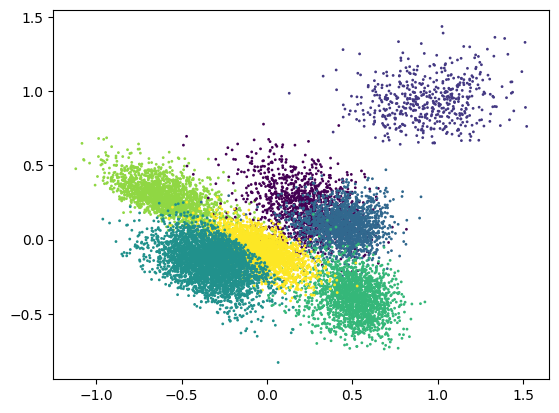

In [ ]:
plt.scatter(data[:, 0], data[:, 1], s = 1, c = label_num)
plt.show()

Pese a que los clusters se ven bien definidos, el cluster grande de la izquierda llevaría a pensar que es un único cluster grande, pero eso es problema de la proyección.

### 4.2 Retención de varianza (3 puntos)

#### Encuentre el numero mínimo de componentes para usar en PCA de tal manera que se mantenga un 95% de varianza. (4 puntos)

In [ ]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

pca = PCA(n_components=7)
com = pca.fit(nrm_cuan)
min_var(0.95, pca.explained_variance_ratio_)

4

Se deben usar al menos 4 componentes.

In [ ]:
pca = PCA(n_components=4)
com_4 = pca.fit_transform(nrm_cuan)

### 4.3 Encontrar el número de componentes ideal (4 puntos)

#### Determina cuantas componentes se necesitan de forma ideal para la mezcla de gaussianas usando el criterio de información de Akaike (AIC).

**RESPUESTA**

Text(0, 0.5, 'AIC')

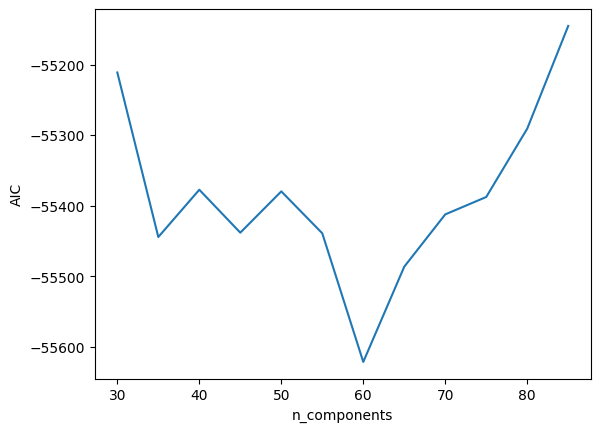

In [ ]:
from sklearn import mixture
n_components = np.arange(30, 90, 5)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(com_4) for n in n_components]

plt.plot(n_components, [m.aic(com_4) for m in models], label='AIC')
plt.xlabel('n_components');
plt.ylabel('AIC')

Se necesitan (alrededor de) 60 componentes.

In [ ]:
#aics = np.asarray([m.aic(com_4) for m in models])
#np.where(aics == np.amin(aics))[0][0]

[-110392.51398955 -110488.98981649 -110601.68327351 -110958.61918197
 -110510.5948827  -110724.89963307]


### 4.4 Uso de función clusterize (6 puntos)

#### Codifica una función que utiliza el modelo `GaussianMixture` de sklearn para separar las clases en `n` grupos. Debes retornar un dataframe que contenga la clasificación. Corre el método con el valor de componentes encontrado en la sección anterior y con el valor de componentes `n_components=7` y retorna el silhouette score resultante para cada clase de cada modelo distinto.

#### Probablemente, un modelo presentará un mejor score por sobre el otro, explica el por qué sucede aquello.

**Respuesta**

In [ ]:
def gm(n):
    df = pd.DataFrame()
    df['ORIGINAL'] = cual
    gmm = mixture.GaussianMixture(n_components=n, covariance_type="full")
    gmm.fit(nrm_cuan)
    pred = gmm.predict(nrm_cuan)
    df['PREDICCIONES'] = pred
    return df

df_7 = gm(7)
df_60 = gm(60)

In [ ]:
sil_7 = silhouette_score(nrm_cuan, df_7['PREDICCIONES'], metric="euclidean")
sil_60 = silhouette_score(nrm_cuan, df_60['PREDICCIONES'], metric="euclidean")
print(sil_7, sil_60)

0.31807347832273797 0.07148557395087546


El modelo de 7 clusters es con diferencia superior al de 60 componentes. Esto se puede explicar ya que 60 componentes es demasiado, por lo que este valor tan alto afectará en el score (recordar que silhouette castiga por tener muchos clusters).

### 4.5 Evaluación del modelo GMM (6 puntos)

**Para esta sección, utilize el modelo con mejor silhouette score obtenido.**

#### 4.5.1 Con respecto a los clusters formados por el modelo ¿Existe alguna especie repartida en más de dos clusters? (2 puntos)

Como se verá en el siguiente punto, si hay especies repetidas en 2 clusters (presición no es =1).

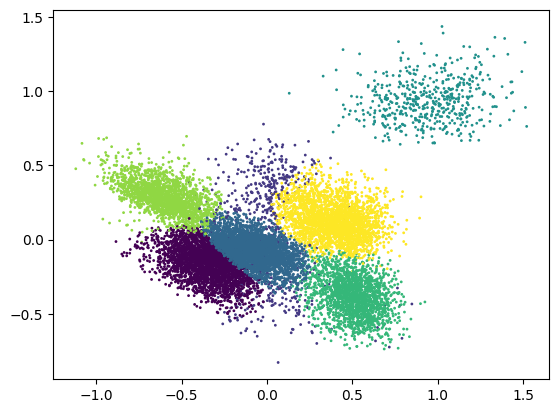

In [ ]:
plt.scatter(data[:, 0], data[:, 1], s = 1, c = df_7['PREDICCIONES'])
plt.show()

#### 4.5.2 Determine la especie predominante en cada cluster según el valor más repetido por grupo. Con esto, calcule la precisión de cada especie al ser clasificada. ¿El modelo GMM tuvo buenos resultados? (4 puntos)

(Recuerde que para calcular la precisión, se puede usar la cantidad de especies encontradas en el cluster dividido en la cantidad total u optima de especies a encontrar en el cluster)

In [ ]:
for i in range(7):
    cluster = df_7[df_7['PREDICCIONES'] == i]['ORIGINAL']
    moda = cluster.mode()[0]
    cont_moda = cluster.value_counts()[moda]
    total = len(cluster)
    print(f'Cluster número {i+1}, moda: {moda}, presición: {cont_moda/total}' )

Cluster número 1, moda: CALI, presición: 0.6085946573751452
Cluster número 2, moda: SIRA, presición: 0.7571247625079164
Cluster número 3, moda: DERMASON, presición: 0.963745160154875
Cluster número 4, moda: BOMBAY, presición: 0.9980879541108987
Cluster número 5, moda: SEKER, presición: 0.93687374749499
Cluster número 6, moda: BARBUNYA, presición: 0.5168350168350169
Cluster número 7, moda: HOROZ, presición: 0.9384133611691023


En general (creo) yo, se tuvo buenos resultados, ya que hay clusters casi perfectos y solo 2 bajo un 75% de presición.

### 4.6 Preguntas teoricas sobre GMM (4 puntos)

Responde brevemente a las siguientes preguntas relacionadas con GMM.

#### 4.6.1 ¿Por qué un desbalance de clases puede ser perjudicial al momento de identificar clusters? Relacione esto con el uso de GMM para clasificar.

Los cluster con menor cantidad de datos pueden sufrir 2 inconvenientes:
* Se incoorporan dentro de otro cluster más grande
* Se pueden llegar a tratar como ruido o outliers.

Esto claramente no es bueno para una clusterización efectiva. Particularmente, GMM tiene problemas con este tipo de datasets.

#### 4.6.2 Explica qué es Akaike Information Criterion (AIC) ¿Existe alguno que se ajuste mejor a este dataset y al uso de GMM? Justifique su respuesta.

Es un método para evaluar que tan bien se ajusta un modelo a un dataset. Este se calcula a partir de el número de variables independientes del modelo ($k$) y de su estimador de máxima verosimilitud. Si $L$ es la bondad de ajuste del modelo, entonces $AIC = 2(k-\ln L)$. La idea es buscar el modelo con $AIC$ más cercano a 0, ya que eso implicaría un balance entre complejidad del modelo y verosimilitud.

SEGUNDA PREGUNTA:?

#### 4.6.3 ¿Qué es un modelo Gaussian Mixtures? ¿En qué escenarios funciona bien y en qué mal? Refierete a esto según el dataset.

La idea de GMM es ajustar un conjunto de curvas gaussianas al dataset, superponiendo varias de estas curvas. El paso de ajuste consiste en encontrar los parámetros de estas gaussianas (media y varianza), posterior a esto se calcula la probabilidad de que cierto punto pertenezca a un cluster. En general, GMM funciona bien con cluster elípticos o esféricos, siendo efectivamente escalable en el número de datos. Puede funcionar mal con datos categóricos o con cluster que no son elípticos. Además, asume que datos están distribuidos normalmente.

#### 4.6.4 ¿Qué es el Silhouette Score? ¿Cual es la importancia de este al momento de interpretar el funcionamiento de un modelo?

Es un método para verificar que tan buena es una clusterización a un dataset, con valores cercanos a 1 implicando un buen ajuste y cercanos a -1 implicando que los cluster no están bien seleccionados. Este coeficiente se calcula según $SS=\frac{b-a}{\max \{a,b\}}$ donde $a=$ distincia promedio dentro de clusters y $b=$ distancia promedio entre clusters distintos. Resulta ser una herramienta útil para testear la clusterización de un modelo, ya que existen mucho algoritmos que clusterizan.

# Parte 5: Comparación y eficiencia (3 puntos)

#### 5.1 ¿Cuál de los métodos de clustering resultó ser el más eficiente entre HAC, DBSCAN, HDBSCAN y GMM? Da una explicación de por qué se puede deber el resultado.

En mi opinión, GMM es el que mejor se ajustó debido a que dió sólidos resultados al realizar clusters. Además, resultó ser el más directo y rápido. Una posible razón es que los clusters no eran esféricos, pero si eran elípticos.

En particular, GMM fue el único método que no unió los 6 clusters cercanos en uno solo, logrando una separación muy cercana a la real.